<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [12]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:


# Cargar los datos de artistas
artists = pd.read_csv('artists.dat', delimiter='\t')
# Seleccionar y renombrar columnas
artists = artists[['id', 'name']].rename(columns={'id': 'artistID', 'name': 'artistname'})

# Cargar los datos de usuarios y artistas
user_artists = pd.read_csv('user_artists.dat', delimiter='\t')
# Renombrar columnas
user_artists = user_artists.rename(columns={'weight': 'nro_reproducciones'})

# Unir las bases de datos
merged_data = pd.merge(user_artists, artists, on='artistID')

# Mostrar las primeras filas del dataframe resultante
merged_data.head()


,userID,artistID,nro_reproducciones,artistname
0,2,51,13883,Duran Duran
1,2,52,11690,Morcheeba
2,2,53,11351,Air
3,2,54,10300,Hooverphonic
4,2,55,8983,Kylie Minogue


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [3]:
# Usuarios y artistas en la base

# Número de usuarios únicos
num_usuarios = merged_data['userID'].nunique()

# Número de artistas únicos
num_artistas = merged_data['artistID'].nunique()

print(f"Número de usuarios únicos: {num_usuarios}")
print(f"Número de artistas únicos: {num_artistas}")

Número de usuarios únicos: 1892
Número de artistas únicos: 17632


In [4]:
# Contar el número de usuarios que escucharon cada artista sin ponderar
consumo_sin_ponderar = user_artists['artistID'].value_counts(normalize=True)

# Mostrar las primeras filas
consumo_sin_ponderar.head()


artistID
89     0.006582
289    0.005623
288    0.005214
227    0.005171
300    0.005095
Name: proportion, dtype: float64

In [5]:
# Calcular el total de reproducciones por artista ponderaro
total_reproducciones_por_artista = user_artists.groupby('artistID')['nro_reproducciones'].sum()

# Calcular la distribución de probabilidad ponderada
consumo_ponderado = total_reproducciones_por_artista / total_reproducciones_por_artista.sum()

# Mostrar las primeras filas
consumo_ponderado.head()


artistID
1    0.000011
2    0.000116
3    0.000011
4    0.000008
5    0.000013
Name: nro_reproducciones, dtype: float64

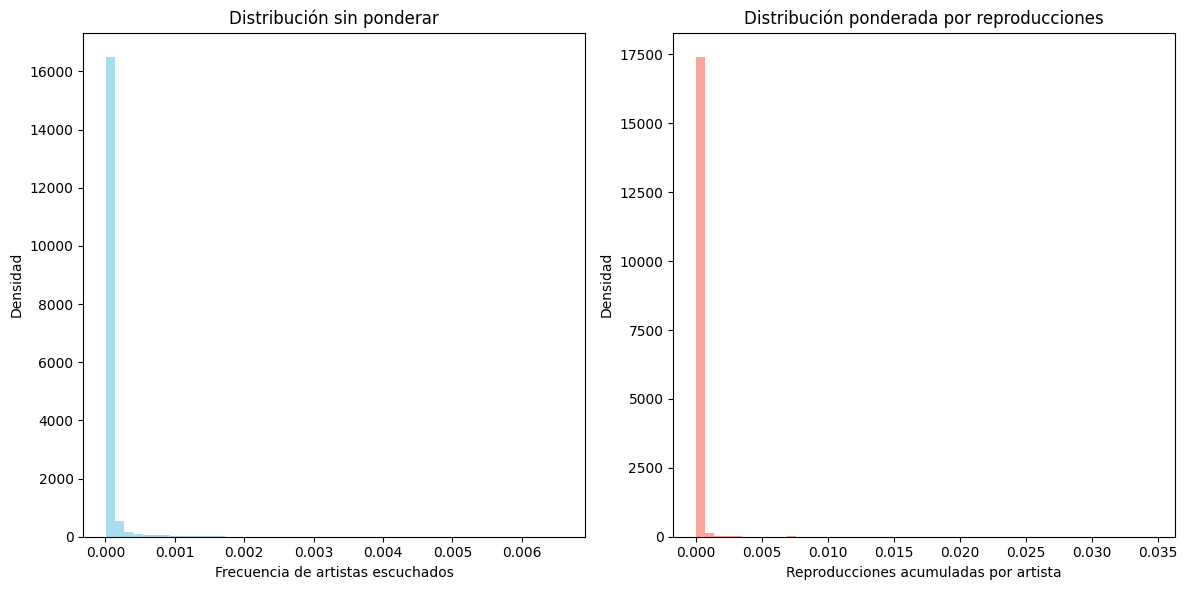

In [6]:
plt.figure(figsize=(12, 6))

# Gráfica de distribución sin ponderar
plt.subplot(1, 2, 1)
consumo_sin_ponderar.plot(kind='hist', bins=50, color='skyblue', alpha=0.7)
plt.title('Distribución sin ponderar')
plt.xlabel('Frecuencia de artistas escuchados')
plt.ylabel('Densidad')

# Gráfica de distribución ponderada
plt.subplot(1, 2, 2)
consumo_ponderado.plot(kind='hist', bins=50, color='salmon', alpha=0.7)
plt.title('Distribución ponderada por reproducciones')
plt.xlabel('Reproducciones acumuladas por artista')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [7]:
# Filtrar los datos para el usuario 8
user_data = merged_data[merged_data['userID'] == 8]

# Calcular las reproducciones relativas
user_data['reproducciones_relativas'] = user_data['nro_reproducciones'] / user_data['nro_reproducciones'].sum()

# Mostrar las primeras filas del dataframe resultante
user_data.head()

C:\Users\dshar\AppData\Local\Temp\ipykernel_14836\107074806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['reproducciones_relativas'] = user_data['nro_reproducciones'] / user_data['nro_reproducciones'].sum()


,userID,artistID,nro_reproducciones,artistname,reproducciones_relativas
300,8,71,181,Dido,0.004989
301,8,89,921,Lady Gaga,0.025387
302,8,97,354,Duffy,0.009758
303,8,251,235,Whitney Houston,0.006478
304,8,257,479,Mariah Carey,0.013203


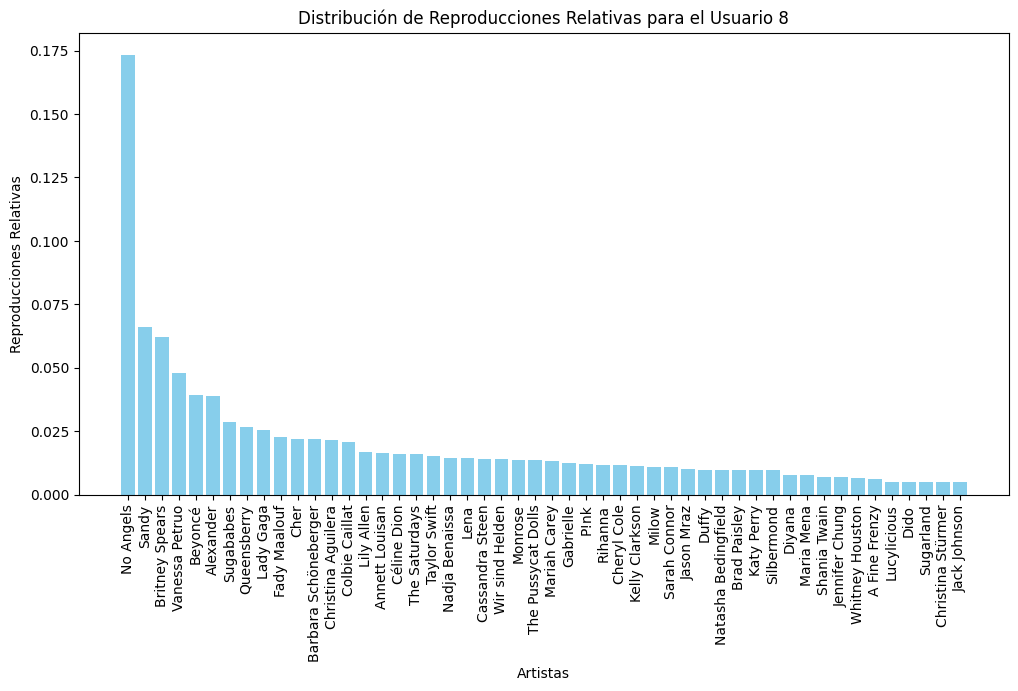

In [8]:
# Ordenar los datos por reproducciones relativas
user_data = user_data.sort_values(by='reproducciones_relativas', ascending=False)

# Graficar las reproducciones relativas
plt.figure(figsize=(12, 6))
plt.bar(user_data['artistname'], user_data['reproducciones_relativas'], color='skyblue')
plt.xlabel('Artistas')
plt.ylabel('Reproducciones Relativas')
plt.title('Distribución de Reproducciones Relativas para el Usuario 8')
plt.xticks(rotation=90)
plt.show()


Podemos decir que el usuario 8 tiene una preferencia marcada por el artista 'No Angels', pero también disfruta de una variedad de otros artistas, lo que nos sugiere que, aunque tiene un favorito claro, su gusto musical es bastante diverso, conociendo la información de cada genero musical de los artistas podriamos tener más claras sus preferencias.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear la matriz de usuario-artista
r_matrix = user_artists.pivot(index='userID', columns='artistID', values='nro_reproducciones')

# Rellenar los valores faltantes con 0
r_matrix_dummy = r_matrix.copy().fillna(0)

# Calcular la popularidad de los artistas (número de usuarios que los han escuchado)
popularidad_artistas = user_artists['artistID'].value_counts()

# Obtener los artistas que el usuario 8 ya ha escuchado
artistas_escuchados_usuario_8 = user_artists[user_artists['userID'] == 8]['artistID'].unique()

# Filtrar los artistas que el usuario 8 ya ha escuchado
artistas_recomendables = popularidad_artistas[~popularidad_artistas.index.isin(artistas_escuchados_usuario_8)]

# Seleccionar los 10 artistas más populares que el usuario 8 no ha escuchado
top_10_recomendaciones = artistas_recomendables.head(10)

# Asegurarse de que el índice esté correctamente alineado
top_10_recomendaciones = top_10_recomendaciones.reset_index()
top_10_recomendaciones.columns = ['artistID', 'count']

# Obtener los nombres de los artistas recomendados
recomendaciones = pd.merge(top_10_recomendaciones, artists, on='artistID')[['artistname', 'artistID']]

# Mostrar las recomendaciones
print(recomendaciones)


        artistname  artistID
0      The Beatles       227
1          Madonna        67
2    Avril Lavigne       333
3             Muse       190
4         Paramore       498
5        Radiohead       154
6         Coldplay        65
7            Ke$ha       466
8          Shakira       701
9  Black Eyed Peas       306


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

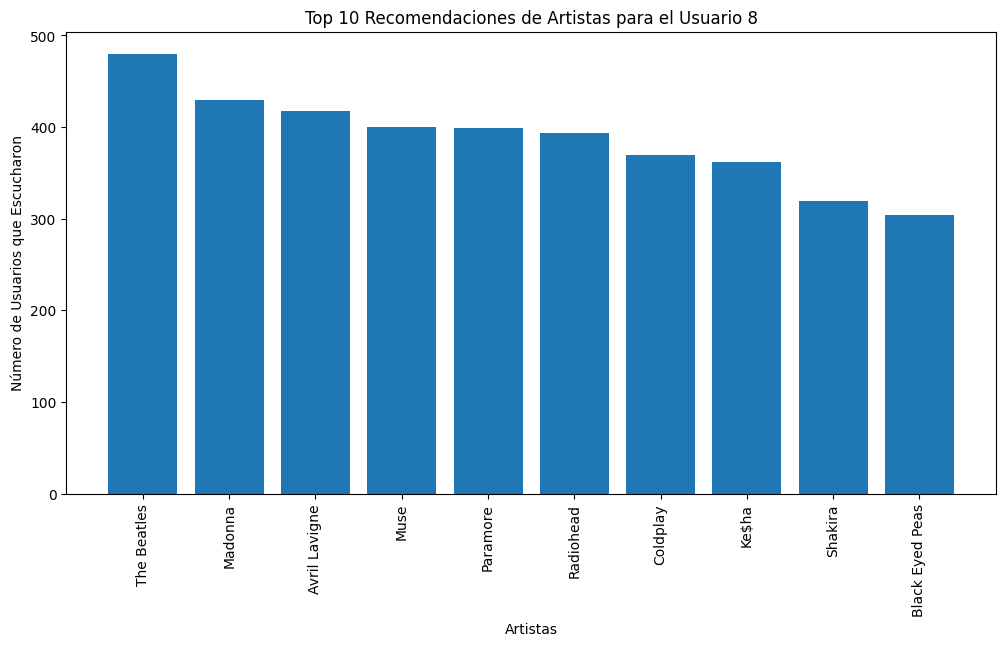

In [22]:
# Graficar las recomendaciones
plt.figure(figsize=(12, 6))
plt.bar(recomendaciones['artistname'], top_10_recomendaciones['count'])
plt.xlabel('Artistas')
plt.ylabel('Número de Usuarios que Escucharon')
plt.title('Top 10 Recomendaciones de Artistas para el Usuario 8')
plt.xticks(rotation=90)
plt.show()

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Utilice un promedio ponderado para generar las recomendaciones. Considere el número de veces que los usuarios reproducen al artista. En otras palabras, genere un ponderador que use el número de veces que el artista fue reproducido (`nro_reproducciones`). Este método pondera la popularidad de un artista, combinando el número de usuarios que lo escuchan con la frecuencia de reproducción, de manera que los artistas con más reproducciones reciban una mayor ponderación.

Genere una tabla y/o gráfica con las 10 principales recomendaciones de artistas para este usuario. Explique detalladamente su procedimiento y justifique sus elecciones. Compare estas recomendaciones con las del sistema implementado en el paso anterior.

In [20]:


# Crear la matriz de usuario-artista
r_matrix = user_artists.pivot(index='userID', columns='artistID', values='nro_reproducciones')

# Rellenar los valores faltantes con 0
r_matrix_dummy = r_matrix.copy().fillna(0)

# Calcular la similitud de coseno
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

# Transformar la matriz resultante en un dataframe
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)

# Función para calcular la media ponderada
def cf_user_wmean(user_id, artist_id):
    # Verificar si el artista está en la matriz
    if artist_id in r_matrix:
        # Obtener las medidas de similitud con otros usuarios
        sim_scores = cosine_sim[user_id]
        
        # Obtener los ratings no faltantes de la matriz bajo evaluación
        m_ratings = r_matrix[artist_id]
        
        # Obtener los índices de los artistas sin rating
        idx = m_ratings[m_ratings.isnull()].index
        
        # Quedarse con similitudes y ratings completos
        sim_scores = sim_scores.drop(idx)
        m_ratings = m_ratings.dropna()
        
        # Calcular la media ponderada
        wmean_rating = np.dot(sim_scores, m_ratings) / sim_scores.sum()
    else:
        # Si no tenemos ninguna información, retornamos 0
        wmean_rating = 0.0
    
    return wmean_rating

# Generar recomendaciones para el usuario 8
user_id = 8
recomendaciones_ponderadas = []

for artist_id in r_matrix.columns:
    if artist_id not in artistas_escuchados_usuario_8:
        score = cf_user_wmean(user_id, artist_id)
        recomendaciones_ponderadas.append((artist_id, score))

# Ordenar las recomendaciones por el puntaje
recomendaciones_ponderadas = sorted(recomendaciones_ponderadas, key=lambda x: x[1], reverse=True)[:10]

# Obtener los nombres de los artistas recomendados
recomendaciones_ponderadas_df = pd.DataFrame(recomendaciones_ponderadas, columns=['artistID', 'score'])
recomendaciones_ponderadas_df = pd.merge(recomendaciones_ponderadas_df, artists, on='artistID')[['artistname', 'artistID', 'score']]

# Mostrar las recomendaciones
recomendaciones_ponderadas_df


C:\Users\dshar\AppData\Local\Temp\ipykernel_14836\461926228.py:31: RuntimeWarning: invalid value encountered in scalar divide
  wmean_rating = np.dot(sim_scores, m_ratings) / sim_scores.sum()


,artistname,artistID,score
0,Matt Bianco,60,4147.000000
1,Brandy,279,1526.746410
2,Matt Pokora,315,1204.469055
3,Janet Jackson,285,1190.614222
4,David Cook,297,1054.007016
5,David Archuleta,304,1021.583438
6,Diary of Dreams,2,1013.046888
7,Carpathian Forest,3,NaN
8,Bella Morte,5,NaN
9,Moonspell,6,NaN


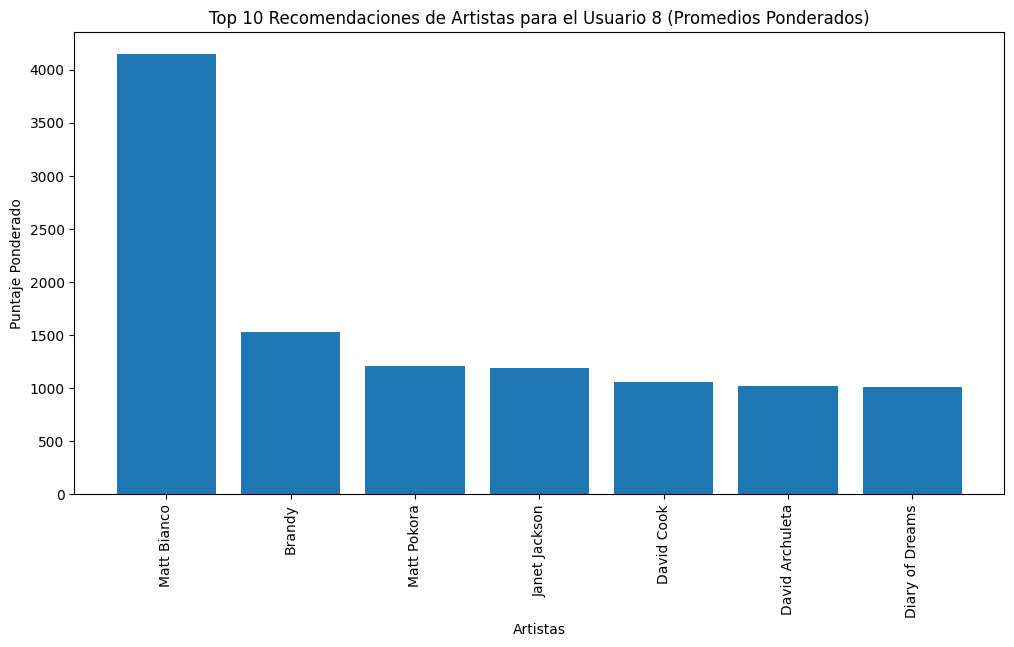

In [23]:
# Graficar las recomendaciones ponderadas
plt.figure(figsize=(12, 6))
plt.bar(recomendaciones_ponderadas_df['artistname'], recomendaciones_ponderadas_df['score'])
plt.xlabel('Artistas')
plt.ylabel('Puntaje Ponderado')
plt.title('Top 10 Recomendaciones de Artistas para el Usuario 8 (Promedios Ponderados)')
plt.xticks(rotation=90)
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).